In [1]:
import pandas as pd

In [2]:
import seaborn as sns



In [3]:
df=pd.read_csv("amazon.csv",encoding="iso-8859-1",parse_dates=['date']) #csv was not utf encoded
df


,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01
...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01


In [4]:
#type of encoding
import chardet
file = 'amazon.csv'
with open(file, 'rb') as f:
    result = chardet.detect(f.read())
result

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}

In [5]:
#1. Display Top 5 Rows of The Dataset
df.head(5)

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [6]:
#2. Check Last 5 Rows
df.tail(5)

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


In [7]:
#3. Find Shape of Our Dataset (Number of Rows And Number of Columns)
df.shape

(6454, 5)

In [8]:
#4. Getting Information About Our Dataset Like Total Number Rows, Total Number of Columns, 
#Datatypes of Each Column And Memory Requirement
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    6454 non-null   int64         
 1   state   6454 non-null   object        
 2   month   6454 non-null   object        
 3   number  6454 non-null   float64       
 4   date    6454 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 252.2+ KB


In [9]:
#5. Check For Duplicate Data and Drop Them
data=df.drop_duplicates()
data.duplicated().any()

False

In [10]:
#6. Check Null Values In The Dataset
data.isnull().any()

year      False
state     False
month     False
number    False
date      False
dtype: bool

In [11]:
#7. Get Overall Statistics About The Dataframe
data.describe()

,year,number
count,6422.000000,6422.000000
mean,2007.490969,108.815178
std,5.731806,191.142482
min,1998.000000,0.000000
25%,2003.000000,3.000000
50%,2007.000000,24.497000
75%,2012.000000,114.000000
max,2017.000000,998.000000


In [12]:
#8. Rename Month Names To English
data.month



0        Janeiro
1        Janeiro
2        Janeiro
3        Janeiro
4        Janeiro
          ...   
6449    Dezembro
6450    Dezembro
6451    Dezembro
6452    Dezembro
6453    Dezembro
Name: month, Length: 6422, dtype: object

In [13]:
mon = data['month'].unique()
monthog = []
for month in mon:
    monthog.append(month)
monthog
monthnew = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for i in range(len(monthog)):
    data['month']=data['month'].replace(monthog[i],monthnew[i])
data.head()

C:\Users\Acer\AppData\Local\Temp/ipykernel_14604/1429576913.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['month']=data['month'].replace(monthog[i],monthnew[i])


,year,state,month,number,date
0,1998,Acre,Jan,0.0,1998-01-01
1,1999,Acre,Jan,0.0,1999-01-01
2,2000,Acre,Jan,0.0,2000-01-01
3,2001,Acre,Jan,0.0,2001-01-01
4,2002,Acre,Jan,0.0,2002-01-01


In [14]:
#9. Total Number of Fires Registered
data.number.sum()


698811.073

In [15]:
#10. In Which Year Maximum Number of Forest Fires Was Reported?
maxforestfireyear = data.groupby('year')['number'].sum().reset_index()
maxforestfireyear


,year,number
0,1998,20013.971
1,1999,26882.821
2,2000,27351.251
3,2001,29054.612
4,2002,37390.600
5,2003,42760.674
6,2004,38450.163
7,2005,35004.965
8,2006,33824.161
9,2007,33028.413


In [16]:
#13. Find Total Number of Fires Were Reported In Amazonas
data[data['state']=="Amazonas"]['number'].sum()

30650.129

In [17]:
#14. Display Number of Fires Were Reported In Amazonas (Year-Wise)
f=data[data['state']=="Amazonas"]
Firenum=f.groupby('year')['number'].sum().reset_index()
Firenum


,year,number
0,1998,946.000
1,1999,1061.000
2,2000,853.000
3,2001,1297.000
4,2002,2852.000
5,2003,1524.268
6,2004,2298.207
7,2005,1657.128
8,2006,997.640
9,2007,589.601


<AxesSubplot:xlabel='date'>

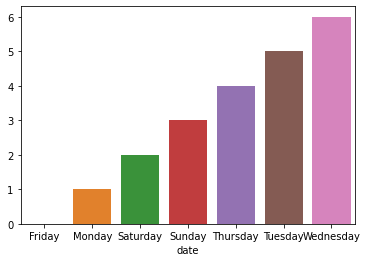

In [18]:
#15. Display Number of Fires Were Reported In Amazonas (Day-Wise)
amazonas = data[data['state'] == "Amazonas"]
daywise = f.groupby(f['date'].dt.day_name())['number'].sum().reset_index()
daywise
sns.barplot(x='date',y=daywise.index,data=daywise)